"Simplicity underlies the best investment strategies. Basic arithmetic works. Keep your investment expenses under control," he says. "Your net return is simply the gross return of your investment portfolio less the costs you incur such as sales commissions, advisory fees, transaction costs. Low costs make your task easier."

As for balancing risk and reward depending on your age, Bogle says:


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
start = '2003-01-01'
end = '2019-01-05'

In [176]:
SPY = get_pricing('SPY',start_date = start,end_date = end)
TLT = get_pricing('TLT',start,end)
TLT.head()

,open_price,high,low,close_price,volume,price
2003-01-02 00:00:00+00:00,56.809,56.938,55.844,55.882,189100.0,55.882
2003-01-03 00:00:00+00:00,55.805,56.057,55.597,56.018,311200.0,56.018
2003-01-06 00:00:00+00:00,55.818,55.895,55.584,55.869,35600.0,55.869
2003-01-07 00:00:00+00:00,55.831,56.193,55.818,56.070,69800.0,56.070
2003-01-08 00:00:00+00:00,56.278,56.446,56.213,56.316,155600.0,56.316


In [177]:
# https://www.ishares.com/us/products/239454/ishares-20-year-treasury-bond-etf#/

In [40]:
def test_first_day_of_year():
    #loop for testing first day of the year across multiple years
    #makes sure that the first trading day for the range of years selected 
    #falls between Jan 1 - Jan 4
    
    year = int(start[:4])

    #Finds and acts on first trading day between Jan 1 - 4
    while year < int(end[:4])+1:
        try:
            date = str(year) + '-01-01'
            SPY.loc[date]['open_price']
            return True
        except KeyError as error:
            try:
                date = str(year) + '-01-02'
                SPY.loc[date]['open_price']
                return True
            except KeyError as error:
                try:
                    date = str(year) + '-01-03'
                    SPY.loc[date]['open_price']
                    return True
                except KeyError as error:
                    date = str(year) + '-01-04'
                    SPY.loc[date]['open_price']
                    return True
        year = year + 1

In [41]:
test_first_day_of_year()

True

In [42]:
def first_trading_day(year):
# return first tradable day between Jan 1 - Jan 4 since it tends to vary from year to year
# based on trials, it seems the first day of trading is rarely, if ever, after Jan 4
    if test_first_day_of_year():   
        try:
            date = str(year) + '-01-01'
            SPY.loc[date]['open_price']
            return date
        except KeyError as error:
            try:
                date = str(year) + '-01-02'
                SPY.loc[date]['open_price']
                return date
            except KeyError as error:
                try:
                    date = str(year) + '-01-03'
                    SPY.loc[date]['open_price']
                    return date
                except KeyError as error:
                    date = str(year) + '-01-04'
                    SPY.loc[date]['open_price']
                    return date

In [43]:
first_trading_day(2003)

'2003-01-02'

In [44]:
#set up portfolio data frame
SPY_price = pd.DataFrame(SPY['open_price'])
TLT_price = pd.DataFrame(TLT['open_price'])
portfolio = pd.concat([SPY_price, TLT_price],axis = 1)
portfolio.columns = ['SPY price','TLT price']

In [178]:
#initialize
cash = 10000
age = 25
year = int(start[:4])
weight = float(age/100.0)

#initial SPY & TLT allocations
date = first_trading_day(year)
portfolio['SPY alloc'] = (cash*(1-weight))/SPY.loc[date]['open_price']
portfolio['TLT alloc'] = (cash*weight)/ TLT.loc[date]['open_price']

#establish value of SPY/TLT/portfolio holdings
portfolio['SPY val'] = portfolio['SPY alloc'] * portfolio['SPY price']
portfolio['TLT val'] = portfolio['TLT alloc'] * portfolio['TLT price']
portfolio['Portfolio value'] = portfolio['SPY val'] + portfolio['TLT val']

''' For a determined period, rebalance portfolio each year.
    Each year, the bond portion of the portfolio will increase by 1%
    to match the age of the investor - a rule of thumb for basic portfolios
    espoused by Bogle - although Bogle himself kept 50/50 equity to bond in 
    his own portfolio in later years '''

while year < int(end[:4]):
    date = first_trading_day(year)
    
    weight = float(age/100.0)
    
    portfolio['SPY alloc'][date:] = (portfolio['Portfolio value'][date]*\
                                     (1-weight))/SPY.loc[date]['open_price']
    portfolio['SPY val'] = portfolio['SPY alloc'] * portfolio['SPY price']
    portfolio['TLT alloc'][date:] = (portfolio['Portfolio value'][date]*\
                                     weight)/TLT.loc[date]['open_price']
    portfolio['TLT val'] = portfolio['TLT alloc'] * portfolio['TLT price']
    
#     print('Year: \t\t %d' % (year))
#     print('Bond weight: \t %.2f' % (weight))
#     print('Age: \t\t %d \n' % (age))
#     print('Total cash: \t %d \n' % (cash))
#     print(portfolio[['TLT price','TLT alloc','TLT val']])


    year += 1
    age += 1

In [149]:
portfolio['Portfolio returns'] = portfolio['Portfolio value'].pct_change(1)
portfolio['Portfolio cumulative return'] = (1+portfolio['Portfolio returns']).cumprod()

In [150]:
#portfolio['Portfolio cumulative return']['2003-12-12':]
portfolio['TLT weight'] = portfolio['TLT val']/(portfolio['TLT val'] + portfolio['SPY val'])
portfolio[:]['2003-12-25':'2004-01-05']


,SPY price,TLT price,SPY alloc,TLT alloc,SPY val,TLT val,Portfolio value,Portfolio returns,Portfolio cumulative return,TLT weight,SPY returns,TLT returns,SPY cumulative return,TLT cumulative return
2003-12-26 00:00:00+00:00,81.795,59.004,115.111889,44.007112,9415.576941,2596.595610,12012.172551,0.003121,1.201217,0.216164,0.002291,0.006139,1.255410,1.038638
2003-12-29 00:00:00+00:00,82.063,58.868,115.111889,44.007112,9446.426927,2590.610643,12037.037570,0.002070,1.203704,0.215220,0.003276,-0.002305,1.259524,1.036244
2003-12-30 00:00:00+00:00,82.794,58.257,115.111889,44.007112,9530.573718,2563.722298,12094.296015,0.004757,1.209430,0.211978,0.008908,-0.010379,1.270743,1.025489
2003-12-31 00:00:00+00:00,82.935,57.965,115.111889,44.007112,9546.804494,2550.872221,12097.676715,0.000280,1.209768,0.210856,0.001703,-0.005012,1.272907,1.020349
2004-01-02 00:00:00+00:00,83.285,57.775,107.773397,54.585845,8975.907348,3153.697176,12129.604525,0.002639,1.212960,0.260000,0.004220,-0.003278,1.278279,1.017004
2004-01-05 00:00:00+00:00,83.248,57.042,107.773397,54.585845,8971.919733,3113.685752,12093.088172,-0.003011,1.209309,0.257636,-0.000444,-0.012687,1.277711,1.004101


In [151]:
portfolio['SPY returns'] = SPY['open_price'].pct_change(1)
portfolio['TLT returns'] = TLT['open_price'].pct_change(1)
portfolio['SPY cumulative return'] = (1 + portfolio['SPY returns']).cumprod()
portfolio['TLT cumulative return'] = (1 + portfolio['TLT returns']).cumprod()
returns = portfolio[['SPY returns','TLT returns']]

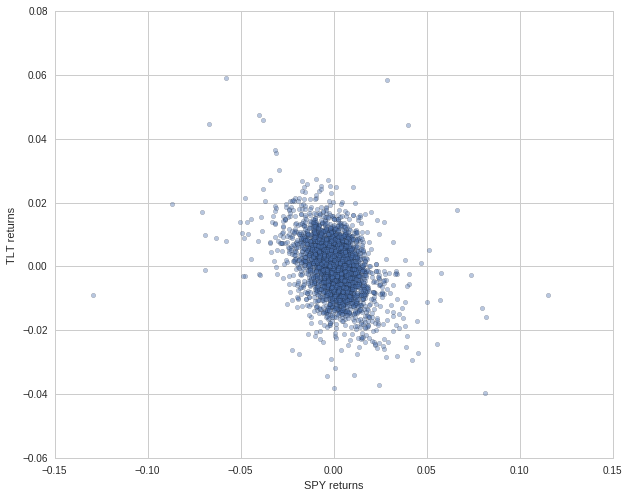

In [152]:
returns.plot(kind='scatter',x='SPY returns',y='TLT returns',alpha=0.4,figsize=(10,8));
#We see that there is not a clear correlation

In [153]:
returns.corr()
#there is a -0.39 correlation between the daily returns on the SPY and the returns on TLT

,SPY returns,TLT returns
SPY returns,1.000000,-0.389473
TLT returns,-0.389473,1.000000


In [154]:
cumulative_returns = portfolio[['TLT cumulative return','SPY cumulative return']]
cumulative_returns.corr()
#however, on a cumulative basis, the movement of bonds and stocks is quite highly correlated (0.86)

,TLT cumulative return,SPY cumulative return
TLT cumulative return,1.000000,0.861706
SPY cumulative return,0.861706,1.000000


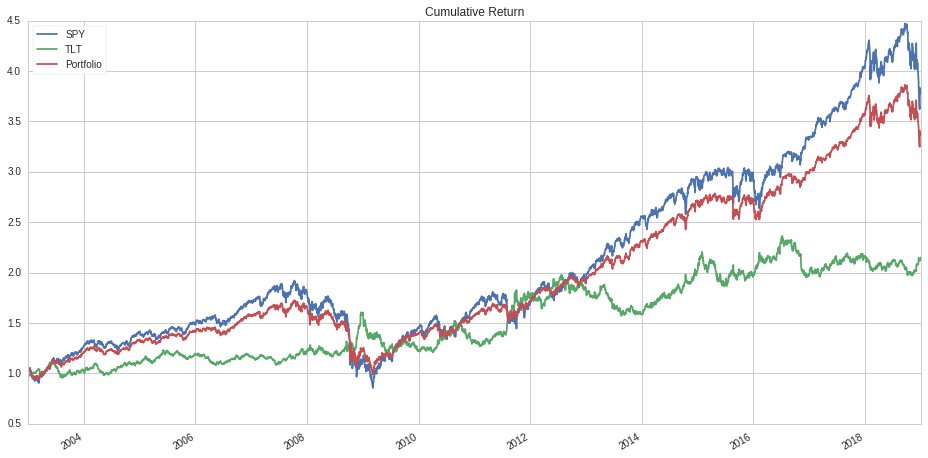

In [155]:
portfolio['SPY cumulative return'].plot(label='SPY',figsize=(16,8),title='Cumulative Return')
portfolio['TLT cumulative return'].plot(label='TLT')
portfolio['Portfolio cumulative return'].plot(label='Portfolio')
#axhline(y=2, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
plt.legend(loc='best');

In [158]:
# Daily returns

print('TLT daily returns std: \t\t\t {:.5f}'\
      .format(portfolio['TLT returns'].std()))
print('SPY daily returns std: \t\t\t {:.5f}'\
      .format(portfolio['SPY returns'].std()))
print('Portfolio daily returns std: \t\t {:.5f} \n'\
      .format(portfolio['Portfolio returns'].std()))

# Cumulative returns

print('TLT cumulative returns std: \t\t {:.5f}'\
      .format(portfolio['TLT cumulative return'].std()))
print('SPY cumulative returns std: \t\t {:.5f}'\
      .format(portfolio['SPY cumulative return'].std()))
print('Portfolio cumulative returns std: \t {:.5f}'\
      .format(portfolio['Portfolio cumulative return'].std()))

TLT daily returns std: 			 0.00811
SPY daily returns std: 			 0.01125
Portfolio daily returns std: 		 0.00806 

TLT cumulative returns std: 		 0.40165
SPY cumulative returns std: 		 0.90591
Portfolio cumulative returns std: 	 0.76765


In [159]:
portfolio.tail(3)

,SPY price,TLT price,SPY alloc,TLT alloc,SPY val,TLT val,Portfolio value,Portfolio returns,Portfolio cumulative return,TLT weight,SPY returns,TLT returns,SPY cumulative return,TLT cumulative return
2019-01-02 00:00:00+00:00,245.98,121.66,81.437302,115.885899,20031.947662,14098.678484,33669.127587,-0.010802,3.366913,0.413080,-0.014345,0.008371,3.775363,2.141562
2019-01-03 00:00:00+00:00,248.23,122.29,81.437302,115.885899,20215.181592,14171.686600,33955.853817,0.008516,3.395585,0.412125,0.009147,0.005178,3.809897,2.152652
2019-01-04 00:00:00+00:00,247.59,122.34,81.437302,115.885899,20163.061719,14177.480895,33884.382564,-0.002105,3.388438,0.412850,-0.002578,0.000409,3.800074,2.153532


In [169]:
# Calculate Sharpe ratio
SPY_sharpe = portfolio['SPY returns'].mean() / portfolio['SPY returns'].std()
TLT_sharpe = portfolio['TLT returns'].mean() / portfolio['TLT returns'].std()
portfolio_sharpe = portfolio['Portfolio returns'].mean() / portfolio['Portfolio returns'].std()

# Annualize Sharpe ratio
SPY_sharpe = SPY_sharpe * (252 ** 0.5)
TLT_sharpe = TLT_sharpe * (252 ** 0.5)
portfolio_sharpe = portfolio_sharpe * (252 ** 0.5)

print('SPY Sharpe Ratio: \t\t {:.5f}'.format(SPY_sharpe))
print('TLT Sharpe Ratio: \t\t {:.5f}'.format(TLT_sharpe))
print('Portfolio Sharpe Ratio: \t {:.5f}'.format(portfolio_sharpe))

SPY Sharpe Ratio: 		 0.55719
TLT Sharpe Ratio: 		 0.43699
Portfolio Sharpe Ratio: 	 0.66048
